# Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

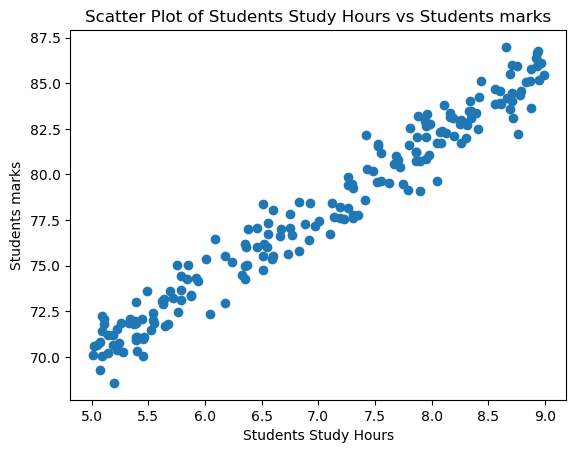

In [7]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [ ]:
# Data Cleaning

In [8]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.study_hours.mean()

In [9]:
df2 = df.fillna(df.study_hours.mean())

In [10]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# split dataset

In [11]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [13]:
X_train

,study_hours
7,8.99
86,5.88
160,7.70
6,6.67
3,5.67
...,...
12,7.75
151,6.77
16,6.36
120,6.52


In [ ]:
y_train

In [14]:
X_test

,study_hours
106,5.340000
183,8.610000
51,7.310000
179,7.260000
48,5.540000
185,8.050000
139,8.600000
93,7.900000
89,8.790000
128,6.380000


In [ ]:
y_test

# Select a model and train it

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([3.93032419])

In [17]:
lr.intercept_

50.43877967508659

In [18]:
m = 3.93032419
c = 50.43877967508659
z  = m * 40 + c 
z

207.65174727508656

In [19]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207.65174743])

In [20]:
y_pred  = lr.predict(X_test)
y_pred

array([71.42671087, 84.27887098, 79.16944953, 78.97293332, 72.21277571,
       82.07788944, 84.23956774, 81.48834081, 84.98632934, 75.51424803,
       72.56650489, 71.19089142, 71.66253032, 82.90325752, 84.08235477,
       71.62322708, 85.14354231, 70.87646548, 81.13461163, 81.33112784,
       78.97293332, 82.66743806, 70.52273631, 76.96846798, 73.19535676,
       84.6719034 , 74.72818319, 82.5102251 , 82.19579916, 83.06047048,
       81.33112784, 78.50129442, 74.37445402, 70.52273631, 82.31370889,
       77.93512618, 84.51469044, 76.61473881, 76.37891935, 84.59329692])

In [21]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.340000,72.10,71.426711
1,8.610000,83.87,84.278871
2,7.310000,77.77,79.169450
3,7.260000,78.17,78.972933
4,5.540000,72.38,72.212776
5,8.050000,79.63,82.077889
6,8.600000,83.91,84.239568
7,7.900000,79.10,81.488341
8,8.790000,84.60,84.986329
9,6.380000,77.01,75.514248


## Fine-tune your model

In [22]:
lr.score(X_test,y_test)

0.9441145832557936

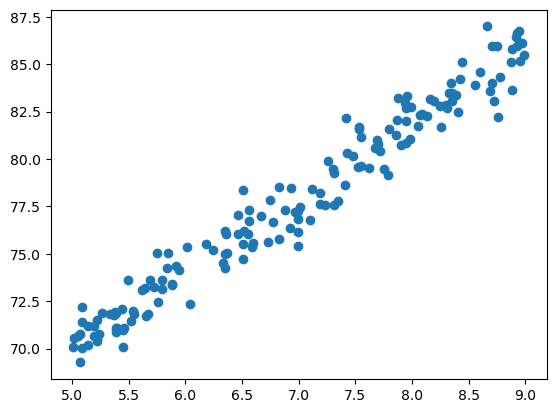

In [23]:
plt.scatter(X_train,y_train)

In [24]:
lr.predict(X_train)

array([85.77239418, 73.54908593, 80.70227597, 76.65404205, 72.72371785,
       76.22170639, 77.6366231 , 77.28289392, 83.41419966, 72.21277571,
       78.34408145, 85.57587797, 80.66297273, 83.06047048, 82.15649592,
       81.80276674, 82.86395427, 83.17838021, 73.43117621, 75.82867397,
       82.2351024 , 71.11228493, 77.28289392, 82.5102251 , 83.25698669,
       75.47494479, 77.93512618, 77.47941013, 80.11272734, 77.93512618,
       70.64064603, 81.68485702, 73.39187297, 73.07744703, 82.07788944,
       72.0162595 , 71.66253032, 70.44412982, 74.17793781, 81.68485702,
       73.7062989 , 70.83716224, 74.96400264, 76.18240314, 83.53210939,
       74.06002808, 79.56248195, 71.58392384, 71.85904653, 70.95507197,
       81.72416026, 72.80232434, 81.37043108, 76.22170639, 71.62322708,
       72.64511137, 72.25207895, 80.58436624, 73.78490539, 81.40973432,
       75.39633831, 73.19535676, 75.82867397, 70.44412982, 80.03412085,
       70.44412982, 76.02519018, 70.95507197, 84.71120664, 72.60

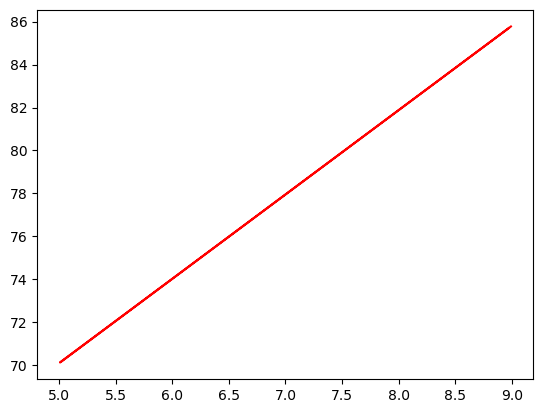

In [25]:
plt.plot(X_train, lr.predict(X_train), 'r-')

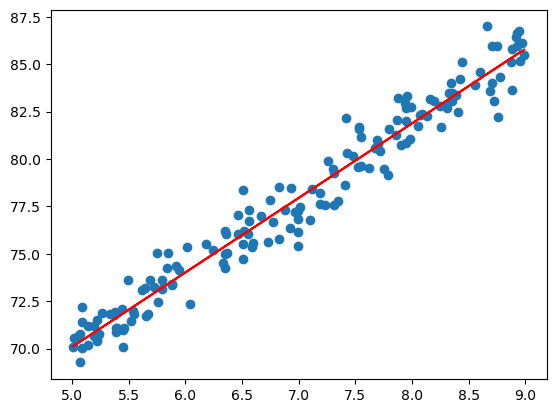

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")